In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature Scaling & Train-Test Split

In [8]:
db= pd.read_csv('processed_data.csv')
X_all = db.drop('CLASS', axis=1)
y_all = db['CLASS']

scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all
)


# 5-Fold CV & GridSearchCV Parameters

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['multinomial']
}

# GridSearchCV & Best Model Evaluation

In [13]:
# --- GridSearchCV ---
grid_lr_all = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr_all.fit(X_train_all, y_train_all)

# --- Best Model Evaluation ---
best_lr_all = grid_lr_all.best_estimator_
y_pred_all = best_lr_all.predict(X_test_all)

print("---- Logistic Regression (All Features) ----")
print("Best Parameters:", grid_lr_all.best_params_)
print("Test Accuracy:", best_lr_all.score(X_test_all, y_test_all),"\n\n")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
---- Logistic Regression (All Features) ----
Best Parameters: {'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.935 




c:\Users\abdel\anaconda3\envs\py12\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Confusion Matrix For All Features


Classification Report:
              precision    recall  f1-score   support

         Non       0.86      0.86      0.86        21
     Predict       0.50      0.10      0.17        10
    Diabetic       0.95      0.99      0.97       169

    accuracy                           0.94       200
   macro avg       0.77      0.65      0.66       200
weighted avg       0.92      0.94      0.92       200



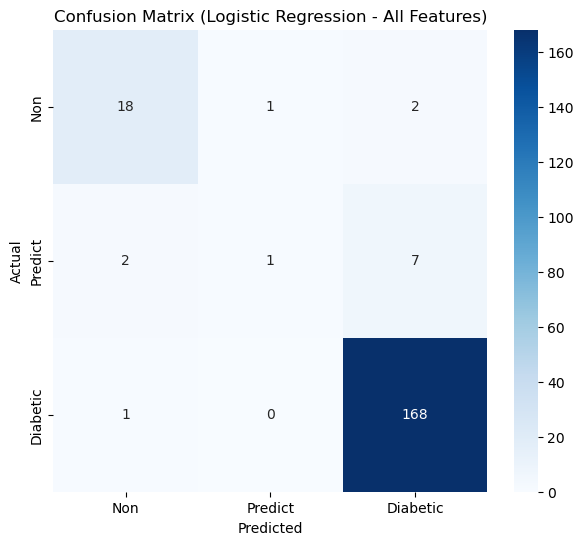

In [15]:
print("\nClassification Report:")
print(classification_report(y_test_all, y_pred_all, target_names=['Non', 'Predict', 'Diabetic']))
cm_all = confusion_matrix(y_test_all, y_pred_all)
plt.figure(figsize=(7,6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression - All Features)")
plt.show()

# Strong Feature Subset

In [16]:
strong_features = ['AGE', 'BMI', 'HbA1c', 'CLASS']
data_strong = db[strong_features]
X_strong = data_strong.drop('CLASS', axis=1)
y_strong = data_strong['CLASS']

# Feature Scaling & Train-Test Split

In [17]:

scaler_strong = StandardScaler()
X_strong_scaled = scaler_strong.fit_transform(X_strong)

X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(
    X_strong_scaled, y_strong, test_size=0.2, random_state=42, stratify=y_strong
)

# GridSearchCV & Best Model Evaluation

In [19]:
grid_lr_strong = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr_strong.fit(X_train_strong, y_train_strong)

best_lr_strong = grid_lr_strong.best_estimator_
y_pred_strong = best_lr_strong.predict(X_test_strong)

print("---- Logistic Regression (Strong Features) ----")
print("Best Parameters:", grid_lr_strong.best_params_)
print("Test Accuracy:", best_lr_strong.score(X_test_strong, y_test_strong))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
---- Logistic Regression (Strong Features) ----
Best Parameters: {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.915


c:\Users\abdel\anaconda3\envs\py12\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Confusion Matrix


Classification Report:
              precision    recall  f1-score   support

         Non       0.83      0.71      0.77        21
     Predict       0.50      0.10      0.17        10
    Diabetic       0.93      0.99      0.96       169

    accuracy                           0.92       200
   macro avg       0.75      0.60      0.63       200
weighted avg       0.90      0.92      0.90       200



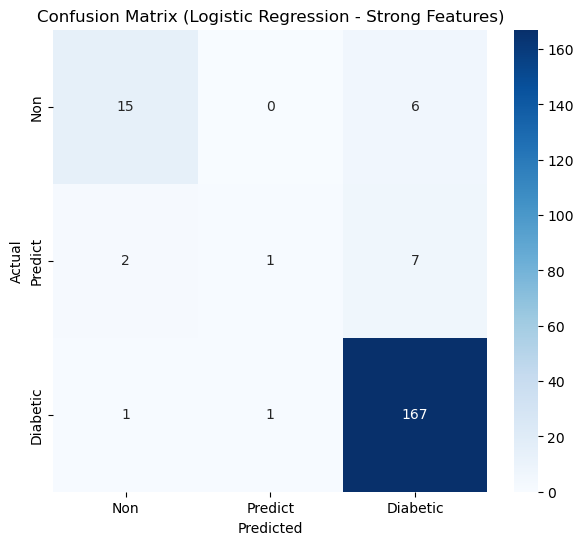

In [20]:
print("\nClassification Report:")
print(classification_report(y_test_strong, y_pred_strong, target_names=['Non', 'Predict', 'Diabetic']))
cm_strong = confusion_matrix(y_test_strong, y_pred_strong)
plt.figure(figsize=(7,6))
sns.heatmap(cm_strong, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression - Strong Features)")
plt.show()

# Conclusion

"All Features vs Strong Features"

  -Using all features, the model considers every available variable, which can capture subtle relationships but may include irrelevant or noisy data.

  -Using strong features (AGE, BMI, HbA1c) focuses on the most predictive variables, simplifying the model and improving interpretability.

"Model Performance"

  -Both models were tuned using 5-Fold Cross-Validation with GridSearchCV, optimizing hyperparameters like C and solver.

  -Evaluation metrics (accuracy, precision, recall, F1-score) and confusion matrices show that Logistic Regression can reliably distinguish between Non, Predict, and Diabetic classes.

"Insights"

  -Strong features alone often provide comparable performance to the full feature set.

  -Logistic Regression coefficients provide interpretable insights into how each feature contributes to diabetes risk.

"Practical Recommendation"

  -For real-world deployment or clinical decision support, the strong features model is preferred for simplicity and interpretability.

  -The all-features model can be used when maximum predictive power is required and computational resources are not an issue.